# Letters

Run the source code:

In [1]:
%run "code\letters.py"

In [2]:
words_3x3, numbers_3x3 = make_2vocab(file='words_3x3.txt')
print(words_3x3, numbers_3x3)

['c', 'chi', 'chic', 'chichi', 'chili', 'chill', 'chilli', 'chilly', 'chit', 'chou', 'ci', 'city', 'cl', 'clio', 'clot', 'cloth', 'clotho', 'clout', 'cloy', 'clutch', 'co', 'cocci', 'coccyx', 'coil', 'col', 'colic', 'colo', 'colt', 'coo', 'cool', 'coolly', 'coot', 'cot', 'couch', 'cox', 'coy', 'coyly', 'cthulhu', 'cu', 'cull', 'cult', 'cut', 'cyclic', 'h', 'hi', 'hill', 'hilly', 'hilt', 'hit', 'hitch', 'ho', 'hohhot', 'holly', 'holt', 'holy', 'hooch', 'hoot', 'hootch', 'hot', 'hotly', 'huh', 'hui', 'hull', 'hut', 'hutch', 'hutu', 'i', 'icily', 'icy', 'ill', 'illicit', 'illicitly', 'io', 'it', 'itch', 'itchy', 'ito', 'j', 'jill', 'jilt', 'jo', 'jollity', 'jolly', 'jolt', 'jot', 'joy', 'juicy', 'jul', 'julio', 'july', 'jut', 'l', 'li', 'licit', 'lilith', 'lilly', 'lilt', 'lily', 'lit', 'litchi', 'lo', 'loci', 'loco', 'loll', 'loot', 'lot', 'loth', 'lott', 'lotto', 'lou', 'lout', 'lox', 'lt', 'lu', 'lucio', 'lucy', 'lull', 'lully', 'lulu', 'lyly', 'lyx', 'o', 'occult', 'oct', 'oh', 'ohio'

## Example 5.1

Here we demonstrate the kernels to detect a letter from its representation in a 3x3 grid. Modify `letter` to any of the given letters and check the output is the one-hot encoding of the letter.

In [3]:
# The letters in order are i,y,j,c,o,l,h,t,u,x
letter = 'c'

G = letter_pixels[letter]
print(f"G = \n{G}")
G = tf.convert_to_tensor(G.reshape(1,3,3))
M = make_explicit_model()
print(f"output = {M.predict(G, verbose=0)}")

G = 
[[1 1 1]
 [1 0 0]
 [1 1 1]]
output = [[[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]]]


We can also check that it rejects non-letters by setting the output to all zeros. A random choice of `G` will give us a non-letter 502 times out of 512.

In [4]:
G = np.random.choice(a=[0, 1], size=(3, 3), p=[0.5, 0.5])
print(f"G = \n{G}")
G = tf.convert_to_tensor(G.reshape(1,3,3))
M = make_explicit_model()
print(f"output = {M.predict(G, verbose=0)}")

G = 
[[1 0 0]
 [0 1 0]
 [1 1 0]]
output = [[[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]]]


Alternatively, the function below tests whether the model output classifies all possible 512 3x3 images correctly.

In [5]:
test_explicit_model(M=M)


True

## Example 5.2

We now demonstrate the convolutional model using the kernels from the model above to search for letters in a grid of height $h$ and width $w$. The variable `word` can be set to any word containing our specified letters, and the function `make_ragged_grid()` will choose appropriate values for $h$ and $w$ and create a grid containing the word.

The output of the model contains a series of one-hot vectors showing the detected letters.

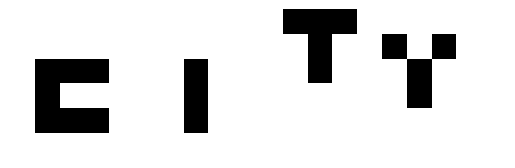

[[[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
   [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
   [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
   [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]]]


In [6]:
word = 'city'

G = make_ragged_grid(word)
plt.axis('off')
plt.imshow(1-G, cmap='gray')
plt.show()

G = tf.convert_to_tensor(G.reshape(1, G.shape[0], G.shape[1]))
GM = make_conv_model(G.shape[1], G.shape[2])
print(GM.predict(G, verbose=0))

## Example 5.3

This example demonstrates the model above with the additional of a layer to count up the occurences of each letter. The output is a single vector containing the counts.

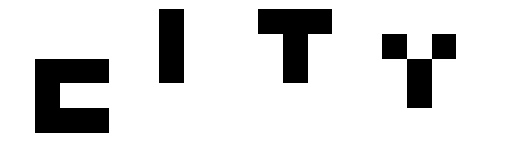

[[[[1.]
   [1.]
   [0.]
   [1.]
   [0.]
   [0.]
   [0.]
   [1.]
   [0.]
   [0.]]]]


In [7]:
word = 'city'

G = make_ragged_grid(word)
plt.axis('off')
plt.imshow(1-G, cmap='gray')
plt.show()

G = tf.convert_to_tensor(G.reshape(1, G.shape[0], G.shape[1]))
SM = make_sum_model(G.shape[1], G.shape[2])
print(SM.predict(G, verbose=0))

## Example 5.4

The following code demonstrates the model that recognises words. The output will be a series of integers from 1 to 10 representing each letter. The sequence is sorted so that the detected letters are moved to the front of the sequence, and the zeros are moved to the end.

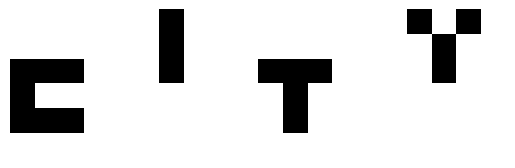

[[4. 1. 8. 2. 0. 0.]]


In [8]:
word = 'city'

G = make_ragged_grid(word)
plt.axis('off')
plt.imshow(1-G, cmap='gray')
plt.show()

G = tf.convert_to_tensor(G.reshape(1, G.shape[0], G.shape[1]))
GRUM = make_gru_model(G.shape[1], G.shape[2])
print(GRUM.predict(G, verbose=0))

We can examine the output at various stages to verify the model is working as described. The code below shows the output of layer $\mathcal{L}^{\left[3\right]}$, which is the sequence $\left\{x_t\right\}_{t=1}^{w_g}$.

In [9]:
GRUM_integers = tf.keras.Model(inputs=GRUM.input, outputs=GRUM.layers[5].output)
print(GRUM_integers.predict(G, verbose=0))

[[[4.]
  [1.]
  [0.]
  [8.]
  [0.]
  [2.]]]


This is used to produce the sequence of indicators in layer $\mathcal{L}^{\left[5\right]}$.

In [10]:
GRUM_indicator = tf.keras.Model(inputs=GRUM.input, outputs=GRUM.layers[7].output)
print(GRUM_indicator.predict(G, verbose=0))

[[[1.]
  [1.]
  [0.]
  [1.]
  [0.]
  [1.]]]


This is used to produce the series of positional indicators $\left\{\pmb{p}_t\right\}_{t=1}^{w_g}$ in layer $\mathcal{L}^{\left[8\right]}$

In [11]:
GRUM_position = tf.keras.Model(inputs=GRUM.input, outputs=GRUM.layers[10].output)
print(GRUM_position.predict(G, verbose=0))

[[[1. 0. 0. 0. 0. 0.]
  [0. 1. 0. 0. 0. 0.]
  [0. 1. 0. 0. 0. 0.]
  [0. 0. 1. 0. 0. 0.]
  [0. 0. 1. 0. 0. 0.]
  [0. 0. 0. 1. 0. 0.]]]


The full combination passed to the final GRU layer is then as follows.

In [12]:
GRUM_final_input = tf.keras.Model(inputs=GRUM.input, outputs=GRUM.layers[13].output)
print(GRUM_final_input.predict(G, verbose=0))

[[[4. 1. 0. 0. 0. 0. 0.]
  [1. 0. 1. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0.]
  [8. 0. 0. 1. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0.]
  [2. 0. 0. 0. 1. 0. 0.]]]


## Example 5.5

The alternative model below shows how the sequence $\left\{\pmb{p}_t\right\}_{t=1}^{w_g}$ could also be created in a more intuitive way using a GRU layer with an initial state.

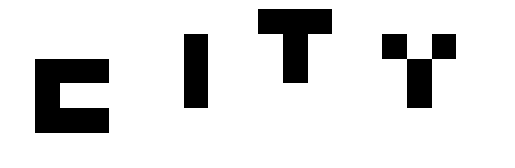

Input to GRU layer:
 [[[1.]
  [0.]
  [1.]
  [1.]
  [0.]
  [1.]]]
Output of GRU layer:
 [[[0. 1. 0. 0. 0. 0. 0.]
  [0. 1. 0. 0. 0. 0. 0.]
  [0. 0. 1. 0. 0. 0. 0.]
  [0. 0. 0. 1. 0. 0. 0.]
  [0. 0. 0. 1. 0. 0. 0.]
  [0. 0. 0. 0. 1. 0. 0.]]]
Final output:
 [[4. 1. 8. 2. 0. 0.]]


In [13]:
word = 'city'

G = make_ragged_grid(word)
plt.axis('off')
plt.imshow(1-G, cmap='gray')
plt.show()

G = tf.convert_to_tensor(G.reshape(1, G.shape[0], G.shape[1]))
GRUaM = make_alt_gru_model(G.shape[1], G.shape[2])

GRUaM_indicator = tf.keras.Model(inputs=GRUaM.input, outputs=GRUaM.layers[7].output)
print(f"Input to GRU layer:\n {GRUaM_indicator.predict(G, verbose=0)}")

GRUaM_position = tf.keras.Model(inputs=GRUaM.input, outputs=GRUaM.layers[8].output)
print(f"Output of GRU layer:\n {GRUaM_position.predict(G, verbose=0)}")

print(f"Final output:\n {GRUaM.predict(G, verbose=0)}")

## Example 5.6

A full model with lookup layers added can be tested below.

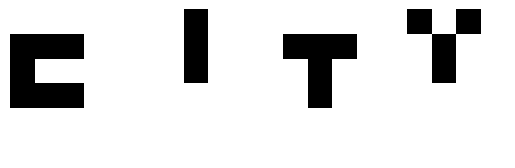

city


In [14]:
word = 'city'

G = make_ragged_grid(word)
plt.axis('off')
plt.imshow(1-G, cmap='gray')
plt.show()

G = tf.convert_to_tensor(G.reshape(1, G.shape[0], G.shape[1]))
FM = make_full_model(G.shape[1], G.shape[2])
# decode() just takes the raw string from the tensor object
[print(z.decode()) for z in FM.predict(G, verbose=0).reshape(1,)]
None